#### THIS PROGRAM LOADS UP THE H SURFACE DATA (Using Hasigma5.f) AND PLOTS IT.

In [1]:
# Libraries used:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from math import *
import scipy as sc
from scipy import stats
import os
import sys
from mpl_toolkits.mplot3d import Axes3D
import ipyvolume as ipv # https://ipyvolume.readthedocs.io/en/latest/install.html
from ipywidgets import VBox
from matplotlib import cm
from matplotlib import ticker 

# Some general setup for plots:
#mpl.rcParams['axes.titlesize'] = 22
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['xtick.labelsize'] = 17
mpl.rcParams['ytick.labelsize'] = 17
mpl.rcParams['legend.fontsize'] = 20
# mpl.rcParams['lines.linewidth'] = 11
# mpl.rcParams['lines.markersize'] = 11

In [2]:
# IMPORTANT PARAMETER DEFINITIONS:

# Kp:K resonance?
Kp = 1
K  = 2
RESONANCIA = str(Kp) + '-' + str(K) # String "Kp-K"

# perturber eccentricity ep?
ep = 0.3
ep_text = "{0:.2g}".format(ep) # .1g implies consider 1 significative digit for ep.
 
# DIRECTORIES:
# Common directory root (in Windows use inverted double slash "\\"; in Linux use single slash "/"):
COMUN = "/home/juan/Escritorio/TESIS/"

# H surface data directory:
dir_H = COMUN + "PROGRAMAS/Hamiltoniano/Hasigma/COPLANAR/" + RESONANCIA + "/ep=" + ep_text + "/"
#dir_H = COMUN + "PROGRAMAS/Hamiltoniano/Hasigma/COPLANAR/Aplicaciones/Marte/"+RESONANCIA+"/"
file_H = "HSUP_high_RHtol=0.00.dat" # filename

# Graphics directory:
dir_graf = COMUN + "DOC/Restricto/" + RESONANCIA + "/ep=" + ep_text + "/"  


# SOME SETUP:
# If ANGLE = 0 => The angles: (0, 360). If ANGLE = 1 => The angles: (-180,180). 
ANGLE = 0
# Use theta instead of sigma? 
THETA = False
# Plot mindis surface?
MINDIS = True
# Filter according RHtol? (encounter if mindis<RHtol)
RHtol = 3
# Save plots? (only normal plots, interactive ones are saved using the widget menu)
GUARDAR = False
# Calidad de imagen? (en ppp, 100 esta ok)
cal = 100
# Formato? ('png', 'jpeg', 'eps', etc)
formato = 'jpeg'
# File names:
fileH_graf = "HSUP." + formato
fileMD_graf = "MDSUP." + formato

In [3]:
# LOAD DATA:
Din_Hsup = pd.read_csv(dir_H + file_H, delimiter=r"\s+")
H = Din_Hsup['H'].values

# Remove outliers (https://www.kite.com/python/answers/how-to-remove-outliers-from-a-pandas-dataframe-in-python) 
z_scores = sc.stats.zscore(H)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
Din_Hsup = Din_Hsup[filtered_entries]      

if (MINDIS):    
    Din_Hsup = Din_Hsup[Din_Hsup['mindis'].values >= RHtol]
    MD_sup = Din_Hsup['mindis'].values
    
# Obtain variables from dataframe:
E_sup = Din_Hsup['e_ast'].values
W_sup = Din_Hsup['w_ast'].values % 360
H_sup = Din_Hsup['H'].values
S_sup = Din_Hsup['sigma'].values % 360

res_angle = "σ"
if (THETA):
    S_sup = (S_sup - (Kp-K)*W_sup) % 360
    res_angle = "θ"
    
if (ANGLE == 1):
    W_sup = np.where(W_sup>180, W_sup - 360, W_sup)
    S_sup = np.where(S_sup>180, S_sup - 360, S_sup)

In [4]:
# Creating a customized colormap to plot in grayscale the model and in colors the numerical integration
# from matplotlib.colors import ListedColormap, LinearSegmentedColormap

# resol = 32 # Number of levels from 'binary' colormap
# Ncm = 25 # 'binary' colormap is concatenated Ncm times 
#           # So, the total levels are resol*Ncm

# cmap_used = 'gray' # seismic, gray, binary, jet, hsv
# top = cm.get_cmap(cmap_used + '_r', resol)
# bottom = cm.get_cmap(cmap_used, resol)
# newcolors = np.vstack((top(np.linspace(0, 1, resol)), bottom(np.linspace(0, 1, resol))))

# for n in range(Ncm): 
#     seg1 = cm.get_cmap(cmap_used + '_r', resol)
#     seg2 = cm.get_cmap(cmap_used, resol)
#     newcolors = np.vstack(( seg1(np.linspace(0, 1, resol)), seg2(np.linspace(0, 1, resol)), newcolors ))

# newcm = ListedColormap(newcolors, name='Ngrayscale') # newcm is the new colormap used in the next cell

from matplotlib.colors import ListedColormap, LinearSegmentedColormap

resol = 1 # Number of levels from 'binary' colormap
Ncm = 50 # cmap_used colormap is concatenated Ncm times 
          # So, the total levels are resol*Ncm

Nseg2 = 1   

cmap_used = 'gray' # seismic, gray, binary, jet, hsv
top = cm.get_cmap(cmap_used + '_r', resol)
bottom = cm.get_cmap(cmap_used, resol)
newcolors = np.vstack((top(np.linspace(0, 1, resol)), bottom(np.linspace(0, 1, resol))))

i = 0
for n in range(Ncm): 
    seg1 = cm.get_cmap(cmap_used, resol)
    i = i + 1
    if (i<=Nseg2):
        seg2 = seg1
    else:
        seg2 = cm.get_cmap(cmap_used + '_r', resol)
        i = 0

    newcolors = np.vstack(( seg1(np.linspace(0, 1, resol)), seg2(np.linspace(0, 1, resol)), newcolors ))

newcm = ListedColormap(newcolors, name='Ngrayscale') # newcm is the new colormap used in the next cell

In [5]:
# %store -r e_c
# %store -r dw_c
# %store -r sigma_c
%store -r e
%store -r deltaW
%store -r s
# e2 = e
# w2 = deltaW
# s2 = s

/tmp/ipykernel_278649/929558571.py:34: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = plt.colorbar(cm.ScalarMappable(norm=norma, cmap=colormap), ax = plt.gca(),


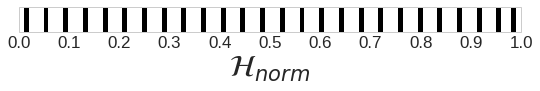

In [14]:
# INTERACTIVE PLOT OF THE 3D H SURFACE:

# Colors used:
#colormap = cm.gist_ncar
#colormap = cm.flag
colormap = newcm

# *** HAMILTONIAN: ***
# Colormap generation:
#H_map = np.log10(np.abs(H_sup))
H_map = (H_sup-H_sup.min())/(H_sup.max()-H_sup.min())
min_H = H_map.min()
max_H = H_map.max()
znorm = H_map - min_H
znorm /= znorm.ptp()
znorm.min(), znorm.max()
color = colormap(znorm)

# ************************************ FIGURE ****************************************
ipv.style.use('seaborn-darkgrid')
fig = ipv.figure()

# * PLOT: *
ipv.scatter(E_sup, W_sup, S_sup, size=1.5, color = color, marker="sphere") # Model
# ipv.scatter(e_c, dw_c, sigma_c, size=2, color = 'blue', marker="sphere") # real data
# ipv.scatter(e1, w1, s1, size=2, color = 'limegreen', marker="sphere") # real data
# ipv.scatter(e2, w2, s2, size=2, color = 'yellow', marker="sphere") # real data

# Single point: 
#ipv.scatter(np.array([0.36]), np.array([0]), np.array([0]), size=3.5, color = 'red', marker="sphere")

# Color bar
norma = mpl.colors.Normalize(vmin=min_H, vmax=max_H)
cb = plt.colorbar(cm.ScalarMappable(norm=norma, cmap=colormap), ax = plt.gca(), 
                  orientation = 'horizontal', shrink = 1.5)
cb.set_label(label=r'$\mathcal{H}_{norm}$', size = 30)
tick_locator = ticker.MaxNLocator(nbins=10)
cb.locator = tick_locator
cb.update_ticks()
plt.gca().set_visible(False)
    
# Box limits:8
ipv.xlim(0, 1)
if (ANGLE == 0):
    ipv.ylim(0, 360)
    ipv.zlim(0, 360)
else:         
    ipv.ylim(-180, 180)
    ipv.zlim(-180, 180)
# labels   
ipv.xyzlabel("e", "ϖ", res_angle)

#ipv.pylab.style.box_on()
#ipv.style.axes_off()#(which = 'x')

# # Save a movie or gif:
# def set_view(fig, framenr, fraction):
#     ipv.view(fraction*360, (fraction - 0.5) * 180, distance=2 + fraction*2)
#     #fig.angley = fraction*np.pi*2
# ipv.movie('prueba.gif', set_view, fps=5, frames=10)

ipv.show()

#  NOTE: Sometimes the interactive plot stop working. Try to re-run this cell. 
#         If doesn't work, reboot Jupyter Lab. If not, the pc.

Delta_min (in Rhill): 3.00645282
Delta_max (in Rhill): 41.22232566


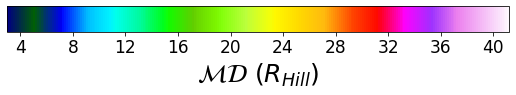

In [7]:
# INTERACTIVE PLOT OF THE 3D mindis SURFACE:
if (MINDIS):
    
    # Colors used:
    colormap2 = cm.gist_ncar
    #colormap2 = cm.flag

    # *** MINDIS: ***
    # Colormap generation:
    min_DIS =  MD_sup.min()
    max_DIS = MD_sup.max()
    znorm2 = MD_sup - min_DIS
    print('Delta_min (in Rhill):', min_DIS)
    print('Delta_max (in Rhill):', max_DIS)
    znorm2 /= znorm2.ptp()
    znorm2.min(), znorm2.max()
    color2 = colormap2(znorm2)    
    
    # ************************************ FIGURE ****************************************

    ipv.style.use('seaborn-darkgrid')
    fig2 = ipv.figure()

    # * PLOT: *
    ipv.scatter(E_sup, W_sup, S_sup, size=1.5, color = color2, marker="sphere")

    # Single point: 
    #ipv.scatter(np.array([0.89]), np.array([68.0]), np.array([67.25]), size=3.5, color = 'red', marker="sphere")

    # Color bar
    norma2 = mpl.colors.Normalize(vmin=min_DIS, vmax=max_DIS)
    cb = plt.colorbar(cm.ScalarMappable(norm=norma2, cmap=colormap2), ax = plt.gca(), orientation = 'horizontal', shrink = 1.5)
    cb.set_label(label=r'$\mathcal{MD}$ ($R_{Hill}$)', size = 25)
    tick_locator = ticker.MaxNLocator(nbins=10)
    cb.locator = tick_locator
    cb.update_ticks()
    plt.gca().set_visible(False)


    # Box limits:
    ipv.xlim(0, 1)
    if (ANGLE == 0):
        ipv.ylim(0, 360)
        ipv.zlim(0, 360)
    else:         
        ipv.ylim(-180, 180)
        ipv.zlim(-180, 180)
    # labels   
    ipv.xyzlabel("e", "ϖ", res_angle)
    #ipv.pylab.style.box_on()
    #ipv.style.axes_off()#(which = 'x')

    ipv.show()
    
#  NOTE: Sometimes the interactive plot stop working. Try to re-run this cell. If doesn't work, reboot Jupyter Lab. If not, the pc.

/tmp/ipykernel_278649/2677347879.py:22: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = plt.colorbar(cm.ScalarMappable(norm=norma, cmap=colormap), ax = plt.gca(),


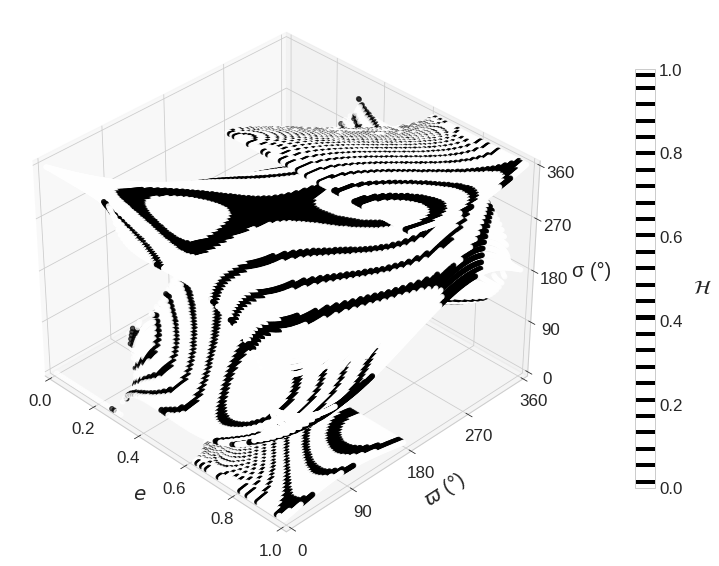

In [8]:
# Normal H surface plot:
plt.style.use('seaborn-whitegrid')
fig3 = plt.figure(figsize=(15,10))
ax = fig3.add_subplot(111, projection='3d')

# Scatter plot:
img1 = ax.scatter(E_sup, W_sup, S_sup, c=color)

# Labels y ticks:
ax.set(xlabel = '\n$e$', ylabel = '\n'+r'  $\varpi$ (°)')
if (ANGLE == 0):
    angles = np.arange(0, 360 + 90, 90)
    ax.set(xlim = [0, 1], ylim = [0, 360], zlim = [0, 360], yticks = angles, zticks = angles)
else:
    angles = np.arange(-180, 180 + 90, 90)
    ax.set(xlim = [0, 1], ylim = [-180, 180], zlim = [-180, 180], yticks = angles, zticks = angles)
ax.zaxis.set_rotate_label(False) 
ax.set_zlabel('          ' + res_angle + ' (°)     ', rotation=0)

# Color bar:
norma = mpl.colors.Normalize(vmin=min_H, vmax=max_H)
cb = plt.colorbar(cm.ScalarMappable(norm=norma, cmap=colormap), ax = plt.gca(), 
                   orientation = 'vertical', shrink=0.9, fraction=0.025, pad=0.1)
cb.ax.set_ylabel(r'$\mathcal{H}$', rotation=0, size=20, labelpad = 20) # improvement to do: normalize colorbar...

# View angle:
ax.view_init(elev=35, azim=315)

plt.show();

# Save image
if (GUARDAR):
    if not os.path.exists(dir_graf):
        os.makedirs(dir_graf)
    fig3.savefig(dir_graf + fileH_graf, dpi = int(cal), format = formato, bbox_inches='tight');
    print('Saved in: ', dir_graf + fileH_graf)

/tmp/ipykernel_278649/1341852180.py:19: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = plt.colorbar(cm.ScalarMappable(norm=norma2, cmap=colormap2), ax = plt.gca(),


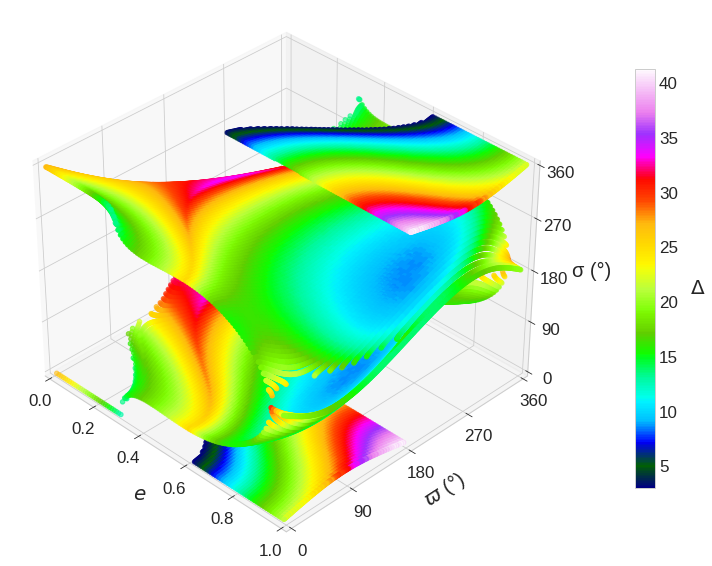

In [9]:
# Normal MinDis surface plot:
plt.style.use('seaborn-whitegrid')
fig4 = plt.figure(figsize=(15,10))
ax = fig4.add_subplot(111, projection='3d')

# Scatter plot:
img2 = ax.scatter(E_sup, W_sup, S_sup, c=color2)

# Labels y ticks:
ax.set(xlabel = '\n$e$', ylabel = '\n'+r'  $\varpi$ (°)')
if (ANGLE == 0):
    ax.set(xlim = [0, 1], ylim = [0, 360], zlim = [0, 360], yticks = angles, zticks = angles)
else:         
    ax.set(xlim = [0, 1], ylim = [-180, 180], zlim = [-180, 180], yticks = angles, zticks = angles)
ax.zaxis.set_rotate_label(False) 
ax.set_zlabel('          ' + res_angle + ' (°)     ', rotation=0)

# Color bar:
cb = plt.colorbar(cm.ScalarMappable(norm=norma2, cmap=colormap2), ax = plt.gca(), 
                   orientation = 'vertical', shrink=0.9, fraction=0.025, pad=0.1)
#ylabel = 'Mín. distance in Rhill'
ylabel = r'$\Delta$'
cb.ax.set_ylabel(ylabel, rotation=0, size=20, labelpad = 20)

# View angle:
ax.view_init(elev=35, azim=315)

plt.show();

# Save image
if (GUARDAR):
    if not os.path.exists(dir_graf):
        os.makedirs(dir_graf)
    fig4.savefig(dir_graf + fileMD_graf, dpi = int(cal), format = formato, bbox_inches='tight');
    print('Saved in: ', dir_graf + fileMD_graf)

In [10]:
# DATA FILTERING IN ORDER TO LOCATE ACR POINTS (1)

# Define box limits:
emin = 0.6
emax = 0.7
wmin = -40
wmax = 40
smin = -40
smax = 40

# View angle

elev, azim = 40, 130

ACR located at (e, w, s) = ( 0.7 , 40.0 , 5.0 )
For integration (e, w, M) = ( 0.7 , 40.0 , 342.5 )


/tmp/ipykernel_278649/2938501802.py:75: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = plt.colorbar(cm.ScalarMappable(norm=norma, cmap=colormap_fil), ax = plt.gca(),


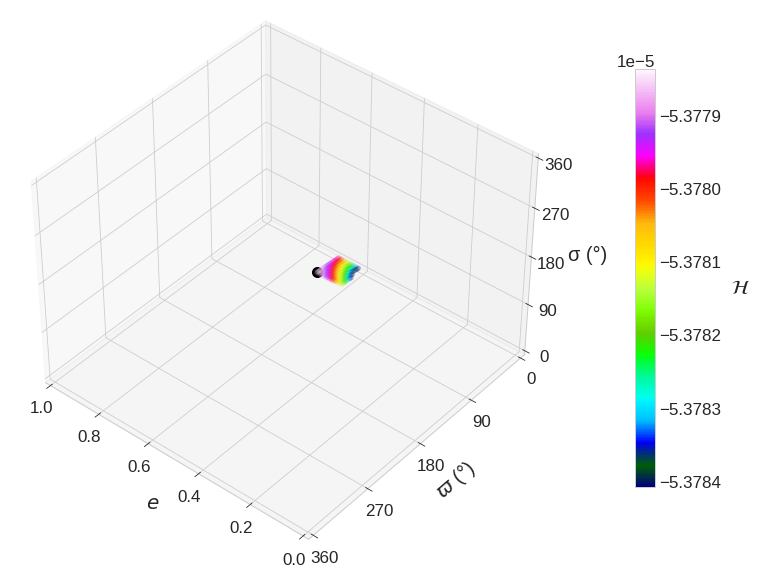

In [11]:
# DATA FILTERING IN ORDER TO LOCATE ACR POINTS (2)

# Filter data
Din_fil = Din_Hsup[ ((E_sup>=emin)&(E_sup<=emax))&((W_sup>=wmin)&(W_sup<=wmax))&((S_sup>=smin)&(S_sup<=smax)) ]
Din_fil.reset_index(inplace=True)

if (MINDIS):    
    Din_Hsup = Din_Hsup[Din_Hsup['mindis'].values >= RHtol]
    MD_sup = Din_Hsup['mindis'].values

# Obtain variables from dataframe:
E_fil = Din_fil['e_ast'].values
W_fil = Din_fil['w_ast'].values % 360
H_fil = Din_fil['H'].values
S_fil = Din_fil['sigma'].values % 360

if (THETA):
    S_fil = (S_fil - (Kp-K)*W_fil) % 360
    
if (ANGLE == 1):
    W_fil = np.where(W_fil>180, W_fil - 360, W_fil)
    S_fil = np.where(S_fil>180, S_fil - 360, S_fil)
    
# Obtain ACR point assuming that occurs in the maximum H:
#e_acr = Din_fil[np.max(-Din_fil['R'].values)]
e_acr = E_fil[Din_fil['H'].idxmax(axis=0, skipna=True)]
w_acr = W_fil[Din_fil['H'].idxmax(axis=0, skipna=True)]
s_acr = S_fil[Din_fil['H'].idxmax(axis=0, skipna=True)]
print('ACR located at (e, w, s) = (',e_acr,',',w_acr,',',s_acr,')')
# Calculate mean anomaly useful for numerical integration:
if (THETA):
    M_acr = ((s_acr - K*w_acr)/K) % 360
else:
    M_acr = ((s_acr - Kp*w_acr)/K) % 360
print('For integration (e, w, M) = (',e_acr,',',w_acr,',',M_acr,')')

# PLOT FILTERED DATA:

# Colors used for filtered hamiltonian:
colormap_fil = cm.gist_ncar
#colormap_fil = cm.flag
#colormap_fil = newcm

# *** HAMILTONIAN: ***
# Colormap generation:
min_Hfil = H_fil.min()
max_Hfil = H_fil.max()
znorm_fil = H_fil - min_Hfil
znorm_fil /= znorm_fil.ptp()
znorm_fil.min(), znorm_fil.max()
color_fil = colormap_fil(znorm_fil)

# Normal H surface plot:
plt.style.use('seaborn-whitegrid')
fig3 = plt.figure(figsize=(15,10))
ax = fig3.add_subplot(111, projection='3d')

# Scatter plot:
img1 = ax.scatter(E_fil, W_fil, S_fil, c=color_fil, zorder = 0, alpha = 0.1)
ax.scatter(e_acr, w_acr, s_acr, s=100, c='k', zorder = 2)

# Labels y ticks:
ax.set(xlabel = '\n$e$', ylabel = '\n'+r'  $\varpi$ (°)')
if (ANGLE == 0):
    angles = np.arange(0, 360 + 90, 90)
    ax.set(xlim = [0, 1], ylim = [0, 360], zlim = [0, 360], yticks = angles, zticks = angles)
else:
    angles = np.arange(-180, 180 + 90, 90)
    ax.set(xlim = [0, 1], ylim = [-180, 180], zlim = [-180, 180], yticks = angles, zticks = angles)
ax.zaxis.set_rotate_label(False) 
ax.set_zlabel('          ' + res_angle + ' (°)     ', rotation=0)

# Color bar:
norma = mpl.colors.Normalize(vmin=min_Hfil, vmax=max_Hfil)
cb = plt.colorbar(cm.ScalarMappable(norm=norma, cmap=colormap_fil), ax = plt.gca(), 
                   orientation = 'vertical', shrink=0.9, fraction=0.025, pad=0.1)
cb.ax.set_ylabel(r'$\mathcal{H}$', rotation=0, size=20, labelpad = 20) # improvement to do: normalize colorbar...

# View angle:
ax.view_init(elev=elev, azim=azim)

plt.show();

# Save image
if (GUARDAR):
    if not os.path.exists(dir_graf):
        os.makedirs(dir_graf)
    fig3.savefig(dir_graf + fileH_graf, dpi = int(cal), format = formato, bbox_inches='tight');
    print('Saved in: ', dir_graf + fileH_graf)

In [12]:
##### OBTAIN DATA FOR INTEGRATION

# e_int array values must be in the (emin,emax) range:
e_int = [0.70, 0.75, 0.80, 0.83, 0.85, 0.87, 0.9, 0.95] # 0.65, 
e_int = np.arange(emin, emax, 0.05)
# print(e_int)

if (ANGLE==1):
    w_acr = np.where(w_acr<0, w_acr + 360, w_acr)
# print(w_acr)
# with pd.option_context('display.max_rows', None):   
#     print(Din_fil)
# np.set_printoptions(threshold=sys.maxsize)

for i in range(len(e_int)):
    s_int = S_fil[(Din_fil['e_ast'].values == e_int[i]) & (Din_fil['w_ast'].values == w_acr)]
#     print(s_int)
    if (len(s_int)!=0):
        s_int = s_int[0]
        if (THETA):
            M_int = ((s_int - K*w_acr)/K) % 360
        else:
            M_int = ((s_int - Kp*w_acr)/K) % 360
        print('(e, w, M) = (',e_int[i],',',w_acr,',',M_int,')')
# print(len(S_fil))

(e, w, M) = ( 0.6 , 40.0 , 343.75 )
(e, w, M) = ( 0.65 , 40.0 , 342.75 )


In [13]:
# PROGRAM END